In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train = pd.read_csv('dataset/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring Data

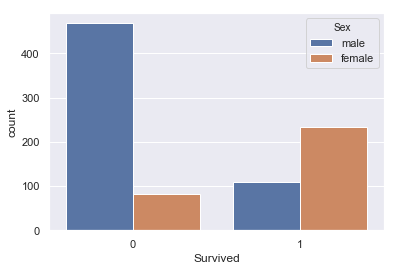

In [3]:
# Survivors
sns.countplot(x='Survived', hue='Sex', data=train)

In [4]:
# Chance to survive by gender
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


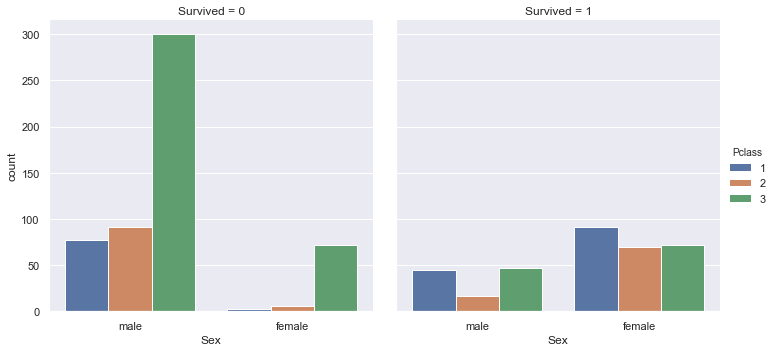

In [5]:
# Exploring Gender Trend in data
sns.catplot(x='Sex', col='Survived', hue='Pclass', data=train, kind='count')

C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


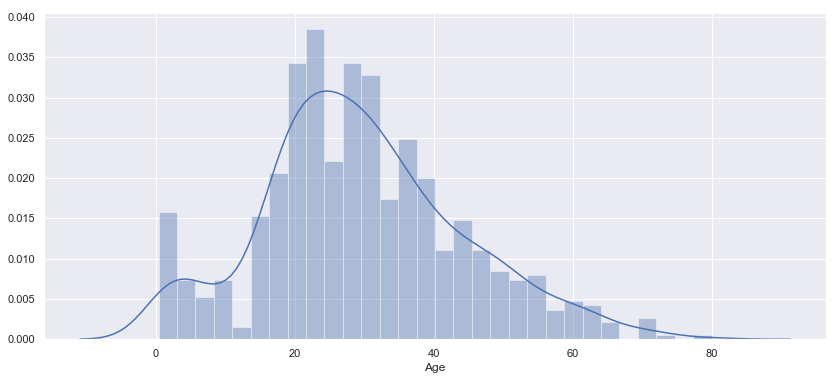

In [6]:
# Exploring Age of passangers
plt.figure(figsize=(14, 6))
sns.distplot(train['Age'].dropna(), kde=True, bins=30)

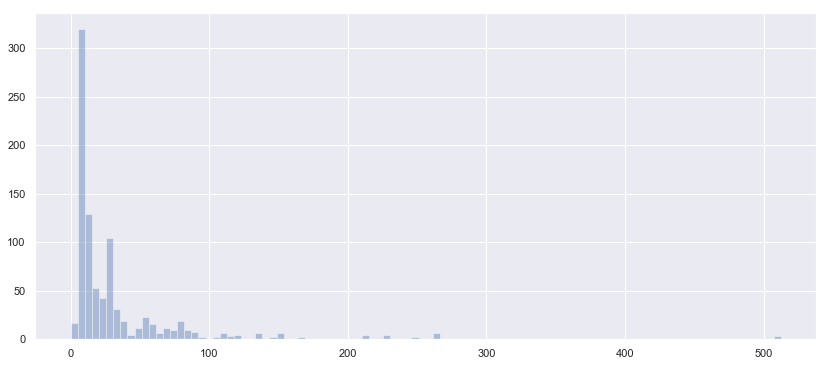

In [7]:
# How much passanger paid for a ticket
plt.figure(figsize=(14, 6))
sns.distplot(tuple(train['Fare']),kde=False, bins=100)

## Cleaning data - Missing Values

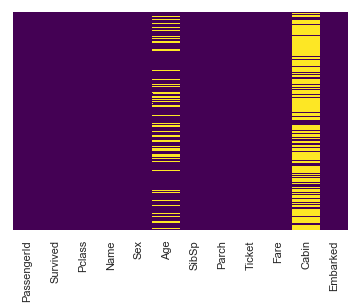

In [8]:
# Explore missing informations
null_values = train.isnull()
sns.heatmap(null_values, cbar=False, yticklabels=False, cmap='viridis')

# Cabin - to much info missing
# Age - imputate average age by class

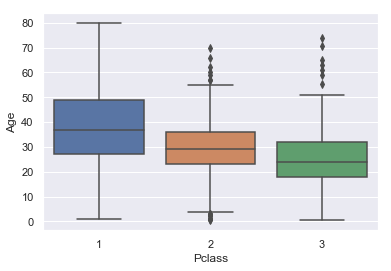

In [9]:
sns.boxplot(x='Pclass', y='Age', data=train)
# Wealthier passangers are older than others

In [10]:
# Calculate mean by class for imputing into empty rows
mean_age_class_1 = train[train['Pclass'] == 1]['Age'].mean()
mean_age_class_2 = train[train['Pclass'] == 2]['Age'].mean()
mean_age_class_3 = train[train['Pclass'] == 3]['Age'].mean()

In [11]:
def insert_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return mean_age_class_1
        
        if Pclass == 2:
            return mean_age_class_2
        
        if Pclass == 3:
            return mean_age_class_3
    else:
        return Age

In [12]:
train['Age'] = train[['Age', 'Pclass']].apply(insert_age, axis=1)

In [13]:
# To many values from Cabin missing, so we drop the entire column
train.drop(labels='Cabin', axis=1, inplace=True)

## Create Dummy Variables

In [14]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.tail()

,male
886,1
887,0
888,0
889,1
890,1


In [15]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.tail()

,Q,S
886,0,1
887,0,1
888,0,1
889,0,0
890,1,0


In [16]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,Q


In [17]:
train = pd.concat([train, sex, embark], axis=1)

In [18]:
train.drop(['PassengerId','Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [19]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [122]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

In [123]:
logmodel.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
test_raw_file=pd.read_csv('dataset/titanic_test.csv')
test = test_raw_file.copy()

# Missing Values
# Calculate mean by class for imputing into empty rows
mean_age_class_1 = test[test['Pclass'] == 1]['Age'].mean()
mean_age_class_2 = test[test['Pclass'] == 2]['Age'].mean()
mean_age_class_3 = test[test['Pclass'] == 3]['Age'].mean()
test['Age'] = test[['Age', 'Pclass']].apply(insert_age, axis=1)
test.drop(labels='Cabin', axis=1, inplace=True)
# Insert average in missing row of 'Fare'
test['Fare'] = test['Fare'].apply(lambda x: test['Fare'].mean() if pd.isnull(x) else x)

# Dummy Variables
sex = pd.get_dummies(test['Sex'], drop_first=True)
sex.tail()
embark = pd.get_dummies(test['Embarked'], drop_first=True)
embark.tail()
test = pd.concat([test, sex, embark], axis=1)
# Drop Necessary Columns
test.drop(['PassengerId','Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
X_test = test
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [169]:
predictions = logmodel.predict(X_test)

## Cross-Validation

In [170]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logmodel, X, y, cv=10)
score.mean()

0.7980101577573487

# Improving model
## Lasso and Ridge Regularization
[Theoretical background](https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/)

In [176]:
# Type of penalty - Lasso(l1) or Ridge(l2)
penalties = ['l1','l2']
C_values = np.linspace(0.2, 20, 41)

In [177]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Cross-Validation
cross_valid = StratifiedKFold(n_splits=10)

# Hyperparameter Tuning
params = {'penalty': penalties, 'C': C_values}

logmodel2 = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=logmodel2, param_grid=params, scoring='accuracy', n_jobs=-1, cv=cross_valid)
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.2  ,  0.695,  1.19 ,  1.685,  2.18 ,  2.675,  3.17 ,  3.665,
        4.16 ,  4.655,  5.15 ,  5.645,  6.14 ,  6.635,  7.13 ,  7.625,
        8.12 ,  8.615,  9.11 ,  9.605, 10.1  , 10.595, 11.09 , 11.585,
       12.08 , 12.575, 13.07 , 13.565, 14.06 , 14.555, 15.05 , 15.545,
       16.04 , 16.535, 17.03 , 17.525, 18.02 , 18.515, 19.01 , 19.505,
       20.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [182]:
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

{'C': 2.6750000000000003, 'penalty': 'l1'}
0.8024691358024691
LogisticRegression(C=2.6750000000000003, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [183]:
logmodel2=grid.best_estimator_

In [184]:
predictions = logmodel2.predict(X_test)
logmodel2.score(X,y)

0.8069584736251403

In [188]:
submission = pd.DataFrame({'PassengerId':test_raw_file.PassengerId, 'Survived': predictions})
submission.head()
submission.to_csv('submission.csv', index=False)